In [1]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create Data

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1) # Column of values

In [4]:
# Error
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [5]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


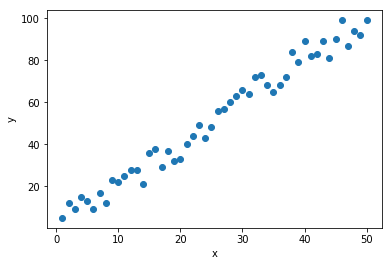

In [6]:
plt.scatter(X.numpy(), y.numpy())  # Convert to numpy for plotting
plt.ylabel('y')
plt.xlabel('x');

**Note that when we created tensor 𝑋, we did not pass requires_grad=True. This means that 𝑦 doesn't have a gradient function, and y.backward() won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between 𝑋 and 𝑦.**

## Model

In [8]:
#### Overview ####
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight) # Selected as random for starting point
print(model.bias) # Selected as random for starting point

# Without seeing any data, the model 
# sets a random weight of 0.1060 and a bias of 0.9638.

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [9]:
# Boiler Plate
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        # Linear is just a **Fully Connected Layer** with Linear Activation
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [10]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [11]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [12]:
# Just checking
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


## Plotting the initial model (random weight values)

[ 1. 50.]
Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


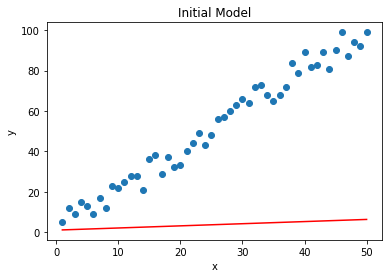

In [13]:
x1 = np.array([X.min(),X.max()])
print(x1)

w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

In [14]:
## Set the loss function
criterion = nn.MSELoss()

In [15]:
## Set Optimization
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [16]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    
    # 1.0 FORWARD PROPAGATION
    y_pred = model.forward(X)
    
    # 2.1 CALCULATE THE LOSS
    loss = criterion(y_pred, y)
    
    # 2.2 RECORD THE ERROR
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
        
    # 3.0 RESET GRADIENTS
    # Gradients accumulate with every iteration of back propagarion.
    # Hence we need to reset it for each step.
    optimizer.zero_grad()
    
    # 3.1 PERFORM BACKWARD PROPAGATION
    loss.backward()
    
    # 4.0 UPDATE THE WEIGHTS
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53100586  weight: 3.33490038  bias: 1.06046367
epoch:  3  loss: 830.30010986  weight: 1.01483274  bias: 0.99226278
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576  bias: 1.02149546
epoch: 10  loss: 28.98922729  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612816  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

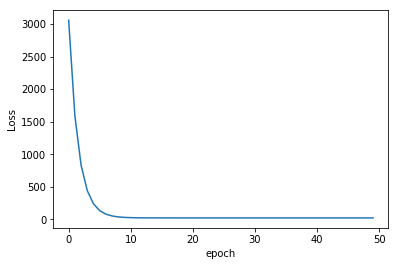

In [17]:
# Plot Losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

Current weight: 1.98381913, Current bias: 1.05575156

[  3.0395708 100.246704 ]


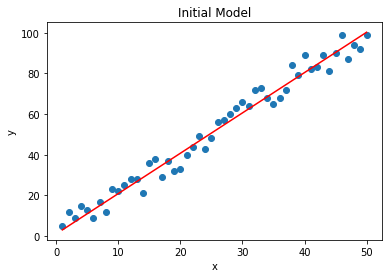

In [20]:
# Plot the Results

w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');